<a href="https://www.kaggle.com/code/obinna11/kidney-stone-urine-analysis?scriptVersionId=125768622" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Kidney Stone Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import lightgbm as lgbm
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("../input/playground-series-s3e12/train.csv")
test = pd.read_csv("../input/playground-series-s3e12/test.csv")
original = pd.read_csv("../input/kidney-stone-prediction-based-on-urine-analysis/kindey stone urine analysis.csv")
submission = pd.read_csv("../input/playground-series-s3e12/sample_submission.csv")

# Key Notes about Dataset

# Understanding Dataset 1

# Understanding Dataset 2

In [3]:
#inspecting the dataset
print("Train Dataset\n",train.head())
print("\n Test Dataset\n", test.head())
print("\n Original Dataset \n", original.head())

Train Dataset
    id  gravity    ph  osmo  cond  urea  calc  target
0   0    1.013  6.19   443  14.8   124  1.45       0
1   1    1.025  5.40   703  23.6   394  4.18       0
2   2    1.009  6.13   371  24.5   159  9.04       0
3   3    1.021  4.91   442  20.8   398  6.63       1
4   4    1.021  5.53   874  17.8   385  2.21       1

 Test Dataset
     id  gravity    ph  osmo  cond  urea   calc
0  414    1.017  5.24   345  11.5   152   1.16
1  415    1.020  5.68   874  29.0   385   3.46
2  416    1.024  5.36   698  19.5   354  13.00
3  417    1.020  5.33   668  25.3   252   3.46
4  418    1.011  5.87   567  29.0   457   2.36

 Original Dataset 
    gravity    ph  osmo  cond  urea  calc  target
0    1.021  4.91   725  14.0   443  2.45       0
1    1.017  5.74   577  20.0   296  4.49       0
2    1.008  7.20   321  14.9   101  2.36       0
3    1.011  5.51   408  12.6   224  2.15       0
4    1.005  6.52   187   7.5    91  1.16       0


In [4]:
#checking for missing values
print("Train Dataset\n",train.isnull().sum())
print("\n Test Dataset\n", test.isnull().sum())
print("\n Original Dataset \n", original.isnull().sum())

Train Dataset
 id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

 Test Dataset
 id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
dtype: int64

 Original Dataset 
 gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64


In [5]:
print("Train dataset descriptive stat \n", train.drop(["id","target"], axis = 1).describe())
print("\n Original dataset descriptive stat \n", original.drop(["target"], axis = 1).describe())

Train dataset descriptive stat 
           gravity          ph         osmo        cond        urea        calc
count  414.000000  414.000000   414.000000  414.000000  414.000000  414.000000
mean     1.017894    5.955459   651.545894   21.437923  278.657005    4.114638
std      0.006675    0.642260   234.676567    7.514750  136.442249    3.217641
min      1.005000    4.760000   187.000000    5.100000   10.000000    0.170000
25%      1.012000    5.530000   455.250000   15.500000  170.000000    1.450000
50%      1.018000    5.740000   679.500000   22.200000  277.000000    3.130000
75%      1.022000    6.280000   840.000000   27.600000  385.000000    6.630000
max      1.040000    7.940000  1236.000000   38.000000  620.000000   14.340000

 Original dataset descriptive stat 
          gravity         ph         osmo       cond        urea       calc
count  79.000000  79.000000    79.000000  79.000000   79.000000  79.000000
mean    1.018114   6.028481   612.848101  20.813924  266.405063   4.

In [6]:
print("Train balanced dataset check \n",train["target"].value_counts())
print("\nOriginal balanced dataset check \n", original["target"].value_counts())

Train balanced dataset check 
 0    230
1    184
Name: target, dtype: int64

Original balanced dataset check 
 0    45
1    34
Name: target, dtype: int64


In [7]:
print("Train info \n", train.info())
print("\nTest info \n", test.info())
print("\nOriginal info \n", original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB
Train info 
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 non-null    float64
 5   urea     276 non-null    int64  
 6   calc     276 non-null    float64
d

In [8]:
#checking for duplicates
print("Duplication in train \n", train[train.duplicated()])
print("\nDuplication in original \n", original[original.duplicated()])

Duplication in train 
 Empty DataFrame
Columns: [id, gravity, ph, osmo, cond, urea, calc, target]
Index: []

Duplication in original 
 Empty DataFrame
Columns: [gravity, ph, osmo, cond, urea, calc, target]
Index: []


# Dataset Summary

# Dataset cleaning

In [9]:
# the only cleaning that identified at this point is the need to remove the feature id from both train and test dataset.
train.drop("id", axis = 1, inplace = True)
test.drop("id", axis = 1, inplace = True)

# Exploratory Data Analysis (EDA) 

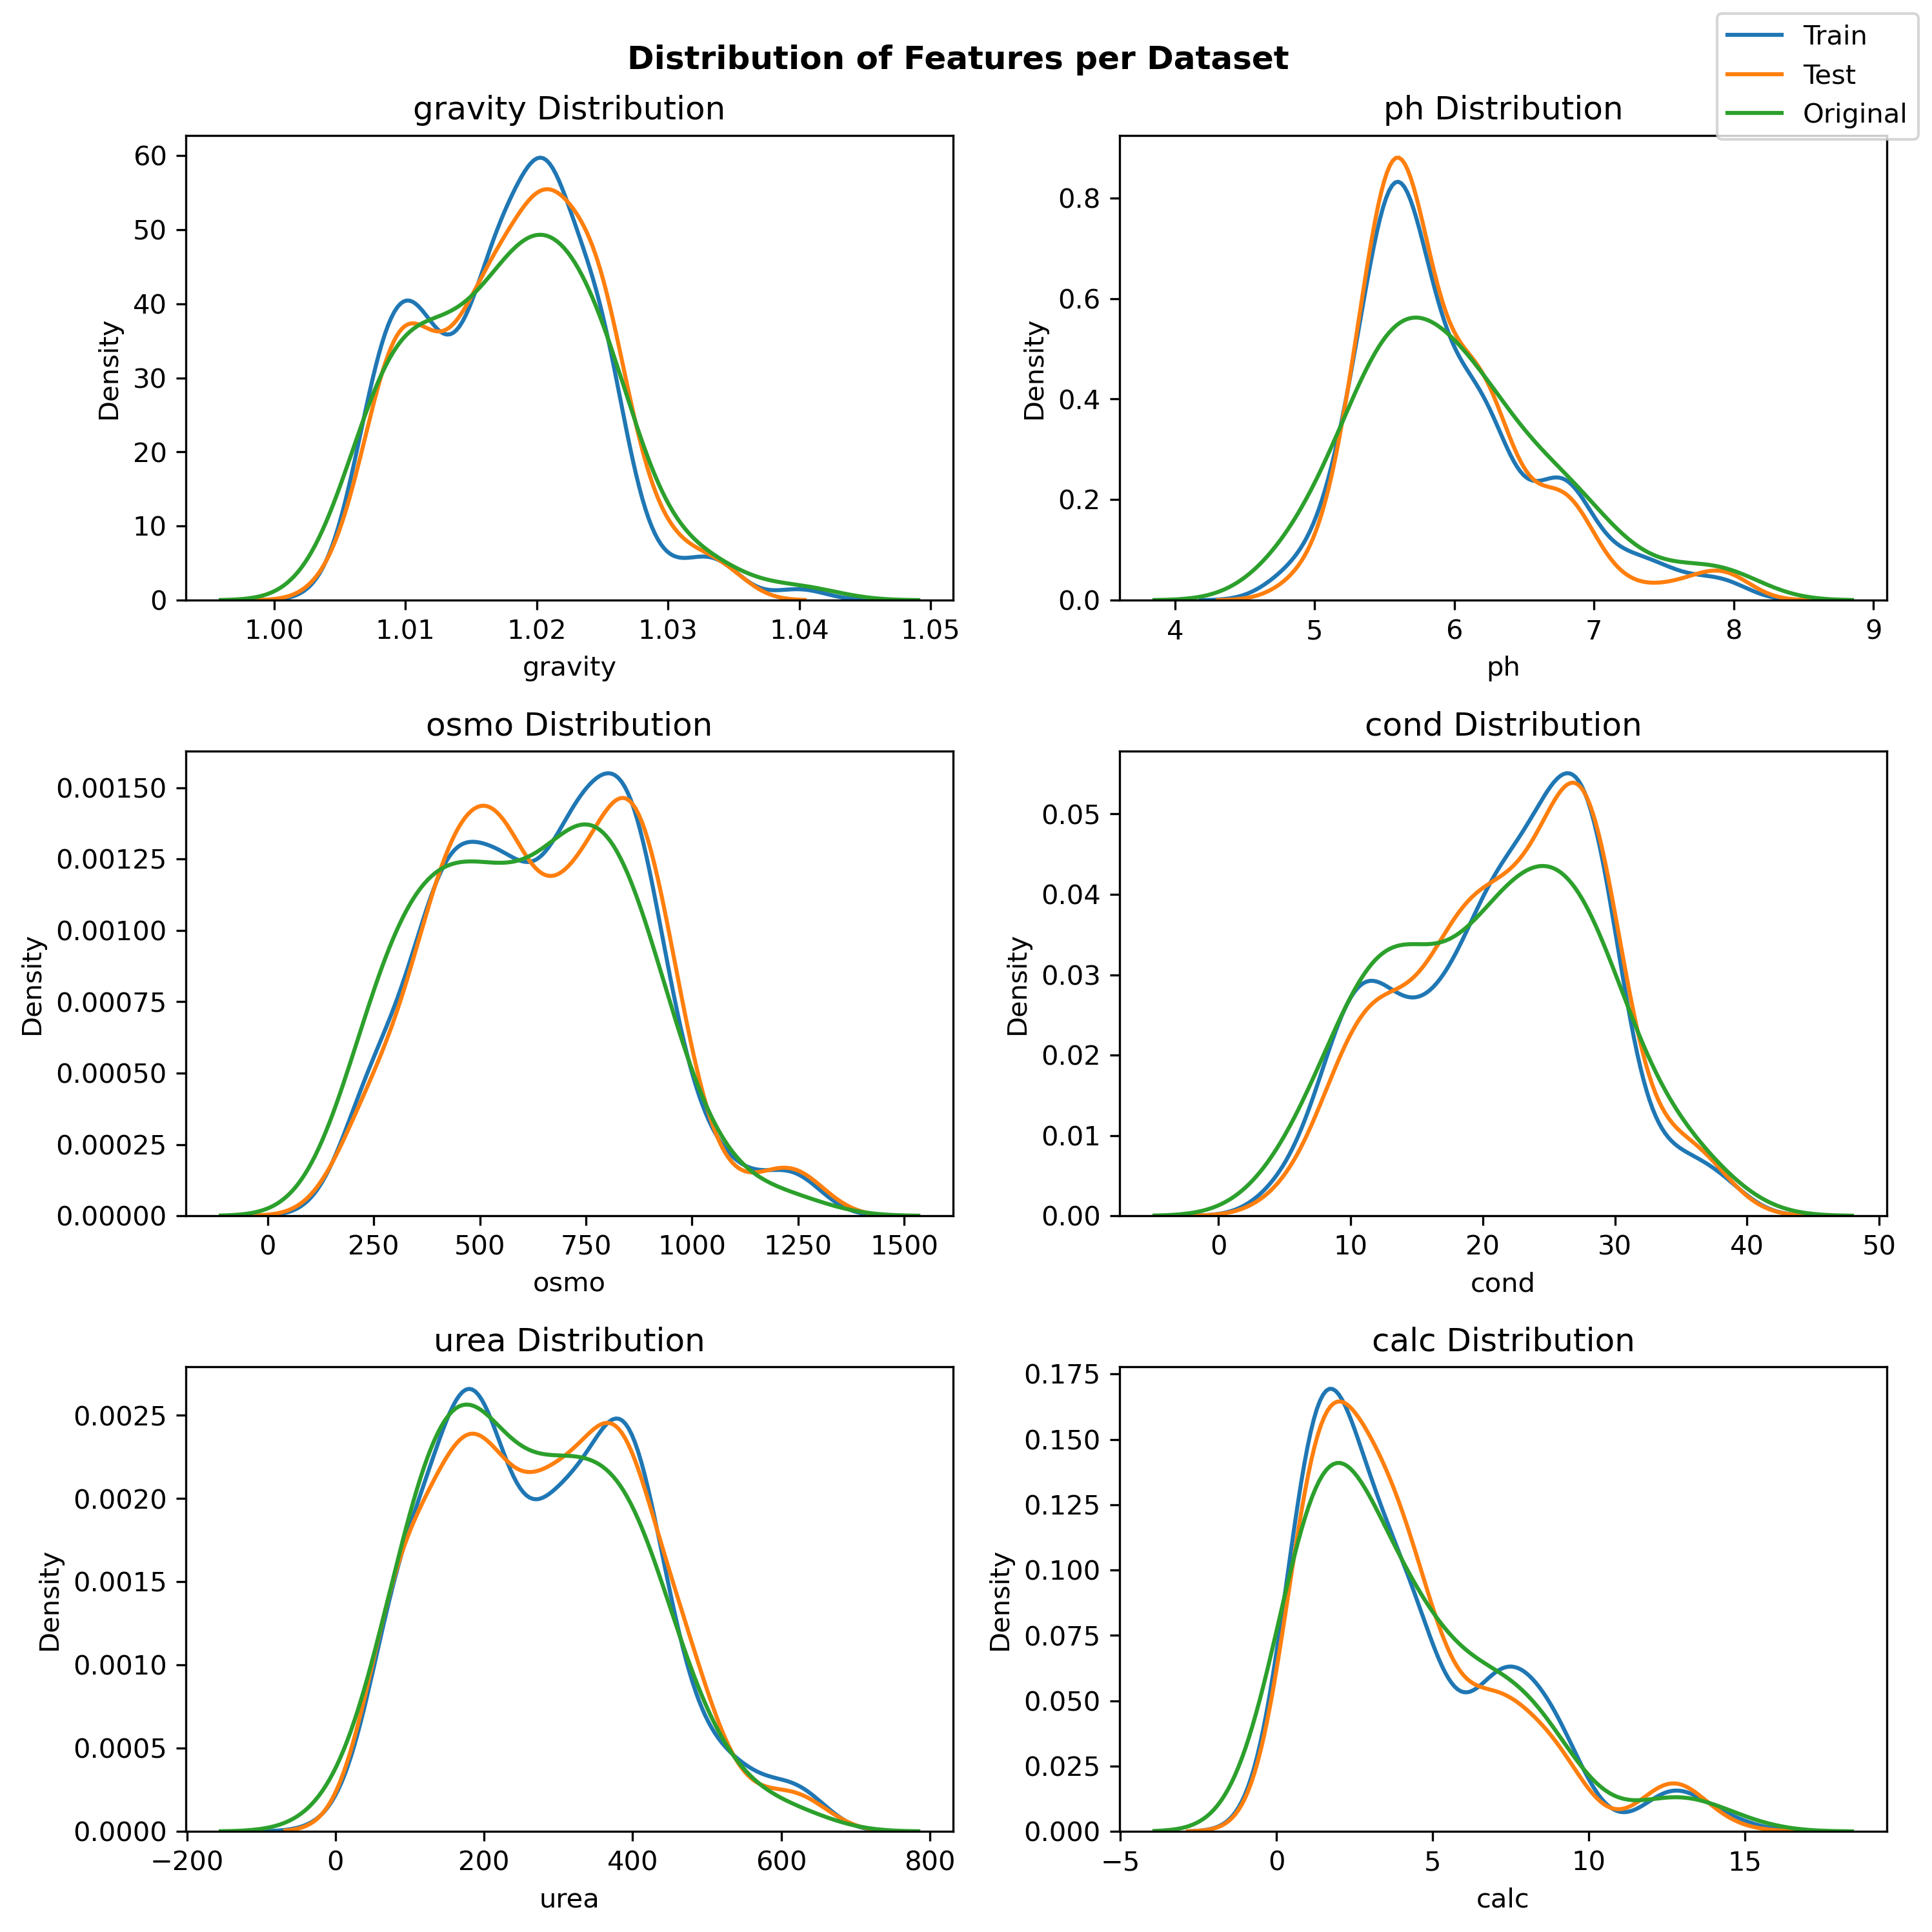

In [10]:
columns = test.columns.tolist()
fig, ax = plt.subplots(3, 2, figsize = (10, 10), dpi = 300)
ax = ax.flatten()

for i in columns:
    
    sns.kdeplot(train[i], ax=ax[columns.index(i)])    
    sns.kdeplot(test[i], ax=ax[columns.index(i)])
    sns.kdeplot(original[i], ax=ax[columns.index(i)])
    
    ax[columns.index(i)].set_title(f"{i} Distribution")

fig.suptitle('Distribution of Features per Dataset', fontsize = 12, fontweight = 'bold')
fig.legend(["Train", "Test", "Original"])
plt.tight_layout()

In [11]:
def cor(data, title):
    corr = data.corr()
    sns.heatmap(corr, annot = True)
    plt.title(f"{title} Correlation Matrix")
    plt.show

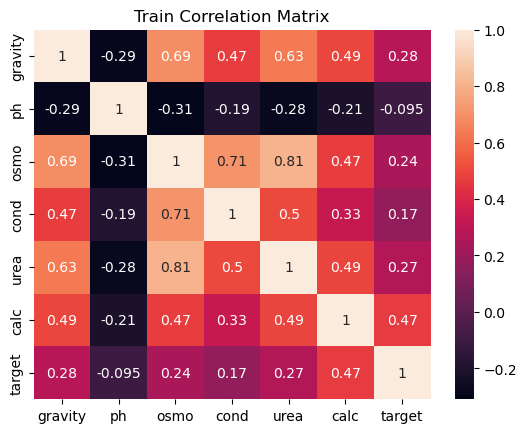

In [12]:
cor(train, "Train")

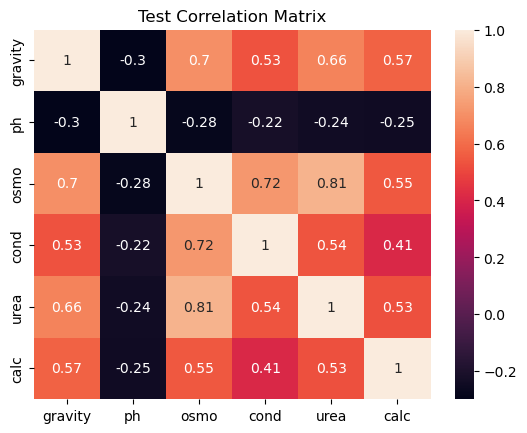

In [13]:
cor(test, "Test")

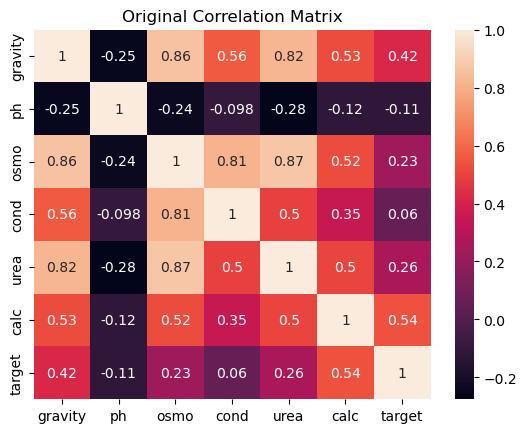

In [14]:
cor(original, "Original")

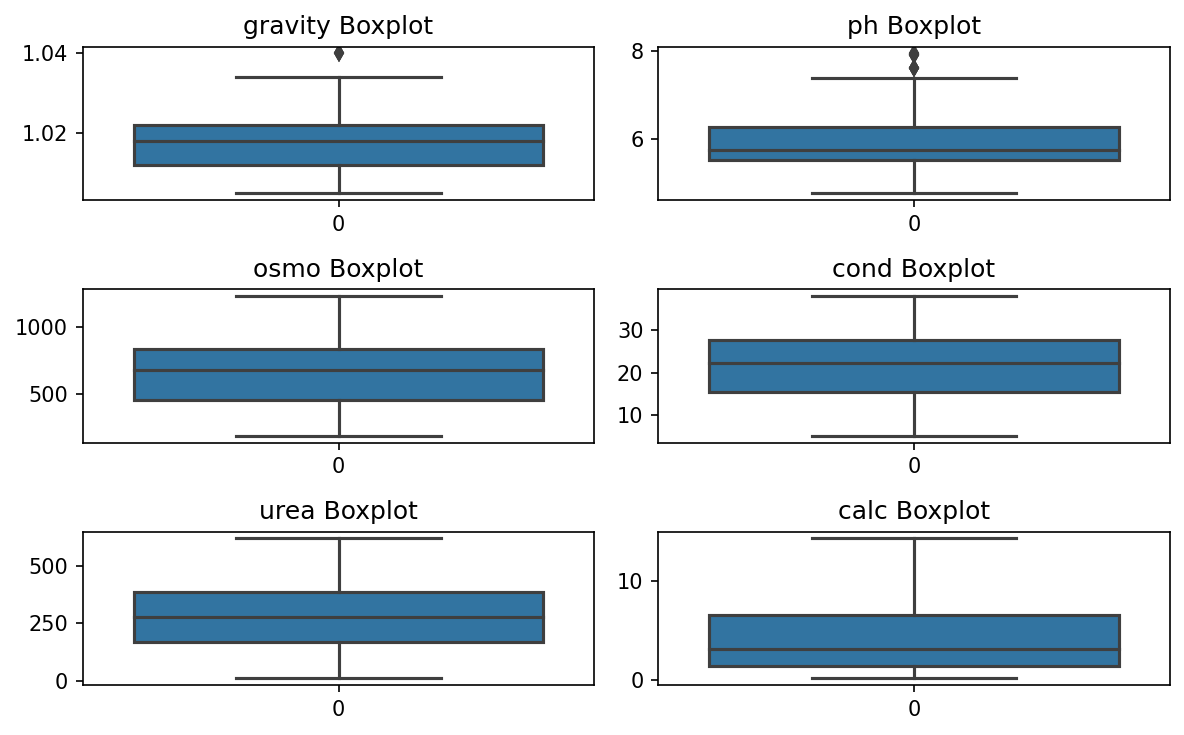

In [15]:
columns = test.columns.tolist()
fig, ax = plt.subplots(3, 2, figsize = (8, 5), dpi = 150)
ax = ax.flatten()

for i in columns:
    
    sns.boxplot(train[i], ax=ax[columns.index(i)])  
    ax[columns.index(i)].set_title(f"{i} Boxplot")
    
plt.tight_layout()

# EDA Observation/conclusion

# Feature Eng and Model training

In [16]:
original_train = pd.concat([original, train])

In [17]:
original_train[original_train.duplicated()]

,gravity,ph,osmo,cond,urea,calc,target


In [18]:
x = original_train.drop("target", axis = 1)
y = original_train["target"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 30, random_state = 1)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
lg = lgbm.LGBMClassifier()
lg.fit(X_train, y_train)
lgResult = lg.predict(X_test)
print(metrics.accuracy_score(y_test, lgResult))

0.8


In [21]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [22]:
from xgboost import XGBClassifier
xb = XGBClassifier()
xb.fit(X_train, y_train)
xbResult = xb.predict(X_test)
print(metrics.accuracy_score(y_test, xbResult))

0.8333333333333334


In [23]:
x_kaggle = original_train.drop("target", axis = 1)
y_kaggle = original_train["target"]
xb = XGBClassifier()
xb.fit(x_kaggle, y_kaggle)
xbResult = xb.predict(test)
submission["target"] = xbResult
submission.to_csv("submission.csv", index = False)

In [24]:
lg = lgbm.LGBMClassifier()
lg.fit(x_kaggle, y_kaggle)
lgResult = lg.predict(test)
submission["target"] = lgResult
submission.to_csv("submission1.csv", index = False)